In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [2]:
!ls

Project 2.ipynb                heloc_dataset_v1.csv
heloc_data_dictionary-2.xlsx   ~$heloc_data_dictionary-2.xlsx


In [233]:
#load data frame
#data preprocessing
df = pd.read_csv('heloc_dataset_v1.csv')
credit = df.copy()
credit.RiskPerformance[credit.RiskPerformance == 'Bad'] = 1
credit.RiskPerformance[credit.RiskPerformance == 'Good'] = 0
credit


/Users/apple/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/apple/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
0,1,55,144,4,84,20,3,0,83,2,...,43,0,0,0,33,-8,8,1,1,69
1,1,61,58,15,41,2,4,4,100,-7,...,67,0,0,0,0,-8,0,-8,-8,0
2,1,67,66,5,24,9,0,0,100,-7,...,44,0,4,4,53,66,4,2,1,86
3,1,66,169,1,73,28,1,1,93,76,...,57,0,5,4,72,83,6,4,3,91
4,1,81,333,27,132,12,0,0,100,-7,...,25,0,1,1,51,89,3,1,0,80
5,1,59,137,11,78,31,0,0,91,1,...,47,0,0,0,62,93,12,4,3,94
6,0,54,88,7,37,25,0,0,92,9,...,58,0,4,4,89,76,7,7,2,100
7,0,68,148,7,65,17,0,0,83,31,...,44,0,0,0,28,48,2,2,2,40
8,1,59,324,2,138,24,0,0,85,5,...,26,0,1,1,68,-8,7,1,3,90
9,1,61,79,4,36,19,0,0,95,5,...,26,0,6,6,31,86,5,3,1,62


In [241]:
credit.describe()

,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,MaxDelq2PublicRecLast12M,...,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
count,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,...,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000
mean,67.425758,184.205373,8.543455,73.843293,19.428052,0.042738,-0.142843,86.661536,6.762406,4.928291,...,32.166460,-0.325366,0.868152,0.812602,31.629888,39.158906,3.185008,0.976097,0.018071,62.079166
std,21.121621,109.683816,13.301745,38.782803,13.004327,2.513910,2.367397,25.999584,20.501250,3.756275,...,20.128634,6.067556,3.179304,3.143698,30.060140,42.101601,4.413173,4.060995,3.358135,27.711565
min,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,...,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,63.000000,118.000000,3.000000,52.000000,12.000000,0.000000,0.000000,87.000000,-7.000000,4.000000,...,20.000000,-7.000000,0.000000,0.000000,5.000000,-8.000000,2.000000,1.000000,0.000000,47.000000
50%,71.000000,178.000000,5.000000,74.000000,19.000000,0.000000,0.000000,96.000000,-7.000000,6.000000,...,31.000000,0.000000,1.000000,1.000000,25.000000,47.000000,3.000000,2.000000,0.000000,67.000000
75%,79.000000,249.500000,11.000000,95.000000,27.000000,1.000000,0.000000,100.000000,14.000000,7.000000,...,44.000000,1.000000,2.000000,2.000000,54.000000,79.000000,5.000000,3.000000,1.000000,82.000000
max,94.000000,803.000000,383.000000,383.000000,79.000000,19.000000,19.000000,100.000000,83.000000,9.000000,...,100.000000,24.000000,66.000000,66.000000,232.000000,471.000000,32.000000,23.000000,18.000000,100.000000


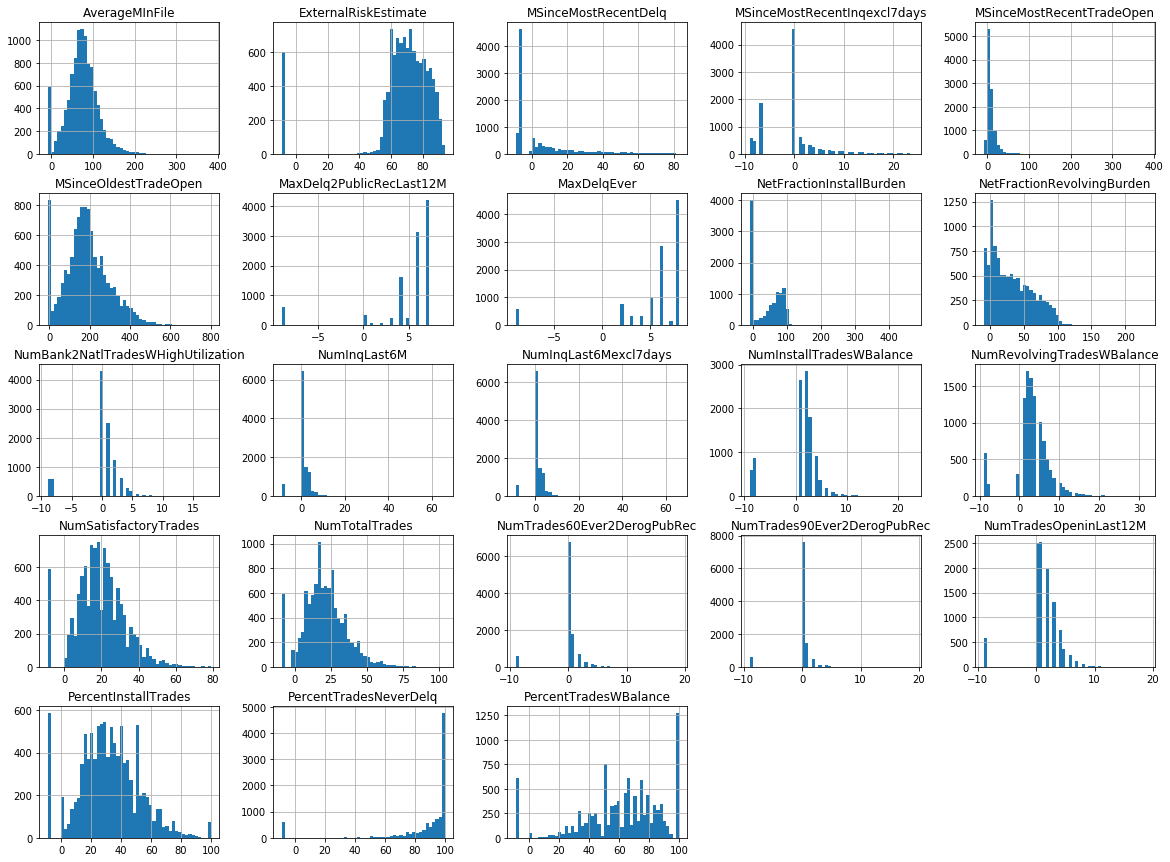

In [232]:
credit.hist(bins=50, figsize=(20,15))
pass

In [5]:
credit.isnull().all()

RiskPerformance                       False
ExternalRiskEstimate                  False
MSinceOldestTradeOpen                 False
MSinceMostRecentTradeOpen             False
AverageMInFile                        False
NumSatisfactoryTrades                 False
NumTrades60Ever2DerogPubRec           False
NumTrades90Ever2DerogPubRec           False
PercentTradesNeverDelq                False
MSinceMostRecentDelq                  False
MaxDelq2PublicRecLast12M              False
MaxDelqEver                           False
NumTotalTrades                        False
NumTradesOpeninLast12M                False
PercentInstallTrades                  False
MSinceMostRecentInqexcl7days          False
NumInqLast6M                          False
NumInqLast6Mexcl7days                 False
NetFractionRevolvingBurden            False
NetFractionInstallBurden              False
NumRevolvingTradesWBalance            False
NumInstallTradesWBalance              False
NumBank2NatlTradesWHighUtilizati

In [239]:
allMissingRows = []
for i in range(0,len(credit)):
    if (credit.iloc[i,1:]<0).all() == True:
        allMissingRows.append(i)
print(len(allMissingRows))


588


In [7]:
credit = credit.drop(allMissingRows).reset_index(drop = True)

In [8]:
credit.MSinceMostRecentDelq = credit.MSinceMostRecentDelq + 1
credit.MSinceMostRecentInqexcl7days = credit.MSinceMostRecentInqexcl7days + 1
credit.MSinceMostRecentDelq[credit.MSinceMostRecentDelq == -6] = 0
credit.MSinceMostRecentInqexcl7days[credit.MSinceMostRecentInqexcl7days == -6] = 0


/Users/apple/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/apple/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [ ]:
credit = credit.mask(credit<0)
#change all the negative numbers to NaN
imputer = Imputer(strategy  = 'median')
credit_new = pd.DataFrame(imputer.fit_transform(credit))
# use median to impute NaN

In [10]:
dummy1 = pd.get_dummies(credit['MaxDelq2PublicRecLast12M'],prefix = 'MD2M')
dummy2 = pd.get_dummies(credit['MaxDelqEver'],prefix = 'MDE')
credit = credit.drop(['MaxDelq2PublicRecLast12M','MaxDelqEver'],axis = 1)
credit = pd.concat([credit,dummy1,dummy2],axis = 1)

In [13]:
credit.columns

Index(['RiskPerformance', 'ExternalRiskEstimate', 'MSinceOldestTradeOpen',
       'MSinceMostRecentTradeOpen', 'AverageMInFile', 'NumSatisfactoryTrades',
       'NumTrades60Ever2DerogPubRec', 'NumTrades90Ever2DerogPubRec',
       'PercentTradesNeverDelq', 'MSinceMostRecentDelq', 'NumTotalTrades',
       'NumTradesOpeninLast12M', 'PercentInstallTrades',
       'MSinceMostRecentInqexcl7days', 'NumInqLast6M', 'NumInqLast6Mexcl7days',
       'NetFractionRevolvingBurden', 'NetFractionInstallBurden',
       'NumRevolvingTradesWBalance', 'NumInstallTradesWBalance',
       'NumBank2NatlTradesWHighUtilization', 'PercentTradesWBalance', 'MD2M_0',
       'MD2M_1', 'MD2M_2', 'MD2M_3', 'MD2M_4', 'MD2M_5', 'MD2M_6', 'MD2M_7',
       'MD2M_9', 'MDE_2', 'MDE_3', 'MDE_4', 'MDE_5', 'MDE_6', 'MDE_7',
       'MDE_8'],
      dtype='object')

In [15]:
credit_new.columns = ['RiskPerformance', 'ExternalRiskEstimate', 'MSinceOldestTradeOpen',
       'MSinceMostRecentTradeOpen', 'AverageMInFile', 'NumSatisfactoryTrades',
       'NumTrades60Ever2DerogPubRec', 'NumTrades90Ever2DerogPubRec',
       'PercentTradesNeverDelq', 'MSinceMostRecentDelq', 'NumTotalTrades',
       'NumTradesOpeninLast12M', 'PercentInstallTrades',
       'MSinceMostRecentInqexcl7days', 'NumInqLast6M', 'NumInqLast6Mexcl7days',
       'NetFractionRevolvingBurden', 'NetFractionInstallBurden',
       'NumRevolvingTradesWBalance', 'NumInstallTradesWBalance',
       'NumBank2NatlTradesWHighUtilization', 'PercentTradesWBalance', 'MD2M_0',
       'MD2M_1', 'MD2M_2', 'MD2M_3', 'MD2M_4', 'MD2M_5', 'MD2M_6', 'MD2M_7',
       'MD2M_9', 'MDE_2', 'MDE_3', 'MDE_4', 'MDE_5', 'MDE_6', 'MDE_7',
       'MDE_8']

In [17]:
credit_new.RiskPerformance = credit_new.RiskPerformance.astype('bool', copy = False)
credit_new
# change the objective variable to boolean value 

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,MD2M_6,MD2M_7,MD2M_9,MDE_2,MDE_3,MDE_4,MDE_5,MDE_6,MDE_7,MDE_8
0,True,55.0,144.0,4.0,84.0,20.0,3.0,0.0,83.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,True,61.0,58.0,15.0,41.0,2.0,4.0,4.0,100.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,True,67.0,66.0,5.0,24.0,9.0,0.0,0.0,100.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,True,66.0,169.0,1.0,73.0,28.0,1.0,1.0,93.0,77.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,True,81.0,333.0,27.0,132.0,12.0,0.0,0.0,100.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,True,59.0,137.0,11.0,78.0,31.0,0.0,0.0,91.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,False,54.0,88.0,7.0,37.0,25.0,0.0,0.0,92.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,False,68.0,148.0,7.0,65.0,17.0,0.0,0.0,83.0,32.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,True,59.0,324.0,2.0,138.0,24.0,0.0,0.0,85.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,True,61.0,79.0,4.0,36.0,19.0,0.0,0.0,95.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [18]:
# split train and test value
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(credit_new, test_size=0.2, random_state=1)

In [25]:
y_true = test_set.RiskPerformance.astype(int)

# define the function to test the model
def ModelPerformance(y_pred):
    
    mat = confusion_matrix(y_true, y_pred, labels=[1,0])
    R = mat[0][0] / (mat[0][0] + mat[1][0])
    P = mat[0][0] / (mat[0][0] + mat[0][1])
    A = (mat[0][0] + mat[1][1]) / (mat[0][0] + mat[0][1] + mat[1][1] + mat[1][0])
    F_1 = 2*P*R / (P+R)
    
    fpr, tpr, threshold = metrics.roc_curve(y_true, y_pred)
    roc_auc = metrics.auc(fpr, tpr)

    print("#Confusion Matrix#")
    print("\n", mat)
    print("\nAccuracy: " + str(A))
    print("Recall: " + str(R))
    print("Precision: " + str(P))
    print("F1 Score: " + str(F_1))
    print("AUC: " + str(roc_auc))
    
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'darkorange', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'navy',linestyle='--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [19]:
# train Randomforest models

clf_rf = RandomForestClassifier()
X = train_set.iloc[:,1:]
Y = train_set.iloc[:,0]
clf_rf = clf_rf.fit(X,Y)

/Users/apple/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [29]:
def bestForest(estimator,param_grid):
    
    GridSearch_rf = GridSearchCV(estimator=estimator,
                                 param_grid= param_grid,
                                 scoring ='accuracy',
                                 cv=10,
                                 return_train_score = True
                                 )
    GridSearch_rf.fit(X,Y)
    best_clf_rf = GridSearch_rf.best_estimator_
    best_clf_rf_train = best_clf_rf.fit(X,Y)
    print('train score:',best_clf_rf_train.score(X,Y))
    return(best_clf_rf_train)


train score: 0.860435663627153
accuracy: 0.7311392405063292
#Confusion Matrix#

 [[774 239]
 [292 670]]

Accuracy: 0.7311392405063292
Recall: 0.726078799249531
Precision: 0.7640671273445212
F1 Score: 0.7445887445887446
AUC: 0.7302664119051089


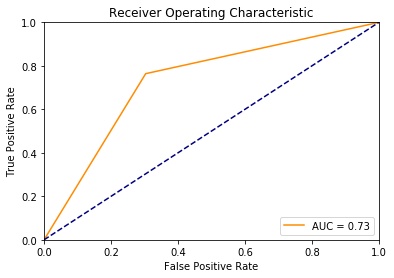

In [199]:
best_clf_rf = bestForest(clf_rf,[{'n_estimators': [100],'max_features' :[0.1], 'max_depth':[30],'min_samples_split': [20],'random_state':[1]}])
testPre_y = best_clf_rf.predict(test_set.iloc[:,1:])
accuracy = np.mean(sum(test_set.iloc[:,0] == testPre_y)/len(testPre_y))
print('accuracy:', accuracy)
ModelPerformance(testPre_y)

In [ ]:
best_clf_rf.predict_proba(test_set.iloc[:,1:])[]

In [54]:
# train adaboost models
clf_ada = AdaBoostClassifier()
clf_ada = clf_ada.fit(X,Y)

In [52]:
def bestBoost(estimator,param_grid):
    
    GridSearch_ada = GridSearchCV(estimator=estimator,
                                 param_grid= param_grid,
                                 scoring ='accuracy',
                                 cv=10,
                                 return_train_score = True
                                 )
    GridSearch_ada.fit(X,Y)
    best_clf_ada = GridSearch_ada.best_estimator_
    best_clf_ada_train = best_clf_ada.fit(X,Y)
    print('train score:',best_clf_ada_train.score(X,Y))
    return(best_clf_ada_train)



train score: 0.7522796352583586
accuracy: 0.7270886075949367
#Confusion Matrix#

 [[738 275]
 [264 698]]

Accuracy: 0.7270886075949367
Recall: 0.7365269461077845
Precision: 0.7285291214215203
F1 Score: 0.7325062034739455
AUC: 0.7270504234966229


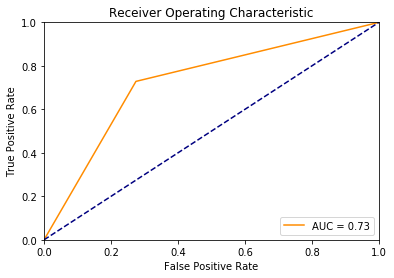

In [76]:
best_clf_ada = bestBoost(clf_ada,[{'n_estimators': [300],'learning_rate': [0.9],'random_state':[1]}])
testPre_y = best_clf_ada.predict(test_set.iloc[:,1:])
accuracy = np.mean(sum(test_set.iloc[:,0] == testPre_y)/len(testPre_y))
print('accuracy:', accuracy)
ModelPerformance(testPre_y)

In [196]:
# train MLP models
from sklearn.neural_network import MLPClassifier
clf_nnt = MLPClassifier(solver='adam',alpha=0.007,hidden_layer_sizes=(5,2),random_state=1,tol = 0.001,beta_1 = 0.9, beta_2 = 0.999)
clf_nnt.fit(X, Y)


MLPClassifier(activation='relu', alpha=0.007, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 2), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='adam', tol=0.001,
              validation_fraction=0.1, verbose=False, warm_start=False)

accuracy: 0.7260759493670886
#Confusion Matrix#

 [[763 250]
 [291 671]]

Accuracy: 0.7260759493670886
Recall: 0.7239089184060721
Precision: 0.7532082922013821
F1 Score: 0.7382680212868893
AUC: 0.7253567448532898


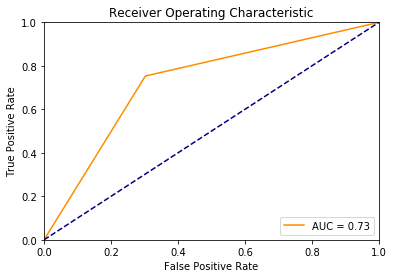

In [197]:
testPre_y = clf_nnt.predict(test_set.iloc[:,1:])
accuracy = np.mean(sum(test_set.iloc[:,0] == testPre_y)/len(testPre_y))
print('accuracy:', accuracy)
ModelPerformance(testPre_y)

In [ ]:
# train Logistic Regression models
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model                 # import package
clf = linear_model.LogisticRegression(penalty='l2',C=10000)  # intialize Logistic Regression model
# grid_values = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}
# grid_clf_acc = GridSearchCV(clf, param_grid = grid_values,scoring = 'recall')
# model1=grid_clf_acc.fit(X_train, y_train)

model1=clf.fit(X_train, y_train) # train classifer with data
model1.score(X_test, y_test)
y_pred=model1.predict(X_test)
# y_pred
ModelPerformance(y_pred)
# plot_decision_boundary_2d(df=X_train,Y=y_train, clf=clf, title='Decision boundary - Logistic regression') # plot
# y_pred=model1.predict(X_test)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model       
logistic = linear_model.LogisticRegression()
penalty = ['l1', 'l2']
C = [0.001,0.01,0.1,1,10,100,1000]
hyperparameters = dict(C=C, penalty=penalty)
clf = GridSearchCV(logistic, hyperparameters, cv=10, verbose=0)
model1=clf.fit(X_train, y_train)
# import warnings
# warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
print('Best Penalty:', model1.best_estimator_.get_params()['penalty'])
print('Best C:', model1.best_estimator_.get_params()['C'])
model1.score(X_test,y_test)
y_pred=model1.predict(X_test)
# y_pred
ModelPerformance(y_pred)

In [ ]:
# train LDA models
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # import package
clf = LinearDiscriminantAnalysis()                                   # intialize LDA
model2=clf.fit(X_train, y_train)                                           # train classifer with data
y_pred2=model2.predict(X_test)
ModelPerformance(y_pred2)

In [ ]:
# train GaussianNB models
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
model3=gnb.fit(X_train, y_train)
model3.score(X_test, y_test)
y_pred3=model3.predict(X_test)
ModelPerformance(y_pred3)

In [ ]:
# train KNN models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
Grid_params={
    "n_neighbors":[3,5,11,19],
    "weights":["uniform","distance"],
    "metric":["euclidean","manhattan","chebychev"]}
gs = GridSearchCV(KNeighborsClassifier(),Grid_params,verbose=1,cv=10,n_jobs=-1)
gs_results=gs.fit(X_train,y_train)

In [ ]:
classifier = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=92, p=2,
                     weights='uniform')
classifier.fit(X_train, y_train)

In [ ]:
y_pred = classifier.predict(X_test)
ModelPerformance(y_pred)

In [ ]:
# train SVM linear
from sklearn import svm
svclassifier = SVC(kernel='linear',C=100)
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'kernel': ['linear'],
              'random_state':[1]}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, cv=10) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train) 
best_para_svmli = grid.best_estimator_

In [ ]:
best_para_svmli_train=best_para_svmli.fit(X_train,y_train)
best_para_svmli_train.score(X_train,y_train)
testdata_y = best_para_svmli_train.predict(X_test)
ModelPerformance(testdata_y)

In [ ]:
# train SVM polynomial
svclassifier = SVC(kernel='poly', degree=8,C=10,gamma=0.0001)
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
ModelPerformance(y_pred)

In [ ]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['poly'],
              'degrees':[0,1,2,3,4,5,6]
              'random_state':[1]}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, cv=10) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train) 
best_para_svmpoly = grid.best_estimator_

In [ ]:
best_para_svmpoly_train=best_para_svmpoly.fit(X_train,y_train)
best_para_svmpoly_train.score(X_train,y_train)
testdata_y = best_para_svmpoly_train.predict(X_test)
ModelPerformance(testdata_y)

In [ ]:
# train SVM rbf
svclassifier = SVC(kernel='rbf',random_state=1,C=9.4,gamma=0.00004)
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
ModelPerformance(y_pred)

In [ ]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf'],
              'random_state':[1]}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, cv=10) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train) 
best_para_svmrbf = grid.best_estimator_

In [ ]:
best_para_svmrbf_train=best_para_svmrbf.fit(X_train,y_train)
best_para_svmrbf_train.score(X_train,y_train)
testdata_y = best_para_svmrbf_train.predict(X_test)
ModelPerformance(testdata_y)

In [ ]:
# train SVM sigmoid
svclassifier = SVC(kernel='sigmoid',C=5.8,gamma=0.0000009)
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
ModelPerformance(y_pred)